### Text preprocessing  and text cleaning for NLP

In [1]:
# Important imports
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [2]:
df = pd.read_csv('twitter_data.csv', encoding = 'latin1') #https://twitter-sentiment-csv.herokuapp.com/

In [3]:
df['sentiment'].value_counts()

neutral     58
positive    26
negative    13
Name: sentiment, dtype: int64

In [4]:
df

,sentiment,text,user
0,neutral,RT @byLilyV: #FEATURED #COURSES\n\n#Machine #L...,Women_who_code
1,neutral,RT @byLilyV: #FEATURED #COURSES\n\n#Machine #L...,xaelbot
2,neutral,RT @byLilyV: #FEATURED #COURSES\n\n#Machine #L...,epuujee
3,neutral,#FEATURED #COURSES\n\n#Machine #Learning A-Zâ...,byLilyV
4,positive,RT @SuriyaSubraman: Top 5 Data Science Certifi...,epuujee
...,...,...,...
92,positive,RT @DataScientistsF: Coursera âIBM Data Scie...,chidambara09
93,neutral,RT @LaForge_AI: How data science is driving in...,hubofml
94,neutral,RT @TheRiverSevern: Anyone want to join @WUFou...,epuujee
95,neutral,RT @Jer1dah: Don't sleep on Udemy. There are f...,DiatonicM


## Word Counts

In [5]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [7]:
df['word_count']

0     18
1     18
2     18
3     16
4     24
      ..
92    15
93    14
94    22
95    24
96    14
Name: word_count, Length: 97, dtype: int64

In [8]:
df.sample(5)

,sentiment,text,user,word_count
62,positive,RT @vrilock: Do policy-makers actually take th...,epuujee,21
54,positive,timely takeaway from today's microbio seminar:...,Enkkkkkkk7,17
72,neutral,RT @Jer1dah: Don't sleep on Udemy. There are f...,GiftOfShange,24
5,neutral,RT @SuriyaSubraman: National Big Data Health S...,epuujee,21
57,neutral,RT @Jer1dah: Don't sleep on Udemy. There are f...,dukesy19x,24


In [9]:
df['word_count'].max()

29

In [10]:
df['word_count'].min()

3

In [11]:
df['word_count']==3

0     False
1     False
2     False
3     False
4     False
      ...  
92    False
93    False
94    False
95    False
96    False
Name: word_count, Length: 97, dtype: bool

In [12]:
df[df['word_count']==3]  # Only 3 twits from this user

,sentiment,text,user,word_count
75,neutral,@shujaat_bukhari @ameerhamza11022 https://t.co...,shobz,3


### Character Count

In [13]:
df['char_count'] = df['text'].apply(lambda x: len(x))
df['char_count']

0     152
1     152
2     152
3     152
4     142
     ... 
92    146
93    145
94    142
95    143
96    145
Name: char_count, Length: 97, dtype: int64

In [ ]:
# problem with the char count is that it also counts the spaces for that we use the following def function 

In [14]:
def char_count(x):
    s = x.split() # splits the whole text
    x = ''.join(s) # joins the whole text
    return len(x)

In [16]:
df['char_count'] = df['text'].apply(lambda x: char_count(str(x)))

In [17]:
df['char_count']

0     135
1     135
2     135
3     137
4     119
     ... 
92    132
93    132
94    121
95    120
96    132
Name: char_count, Length: 97, dtype: int64

In [18]:
df.sample(3)

,sentiment,text,user,word_count,char_count
13,neutral,RT @Eli_Krumova: How to Evaluate a #DataScienc...,BotFemale,12,134
86,neutral,RT @Jer1dah: Don't sleep on Udemy. There are f...,vuyi_chaza,24,120
16,neutral,RT @Eli_Krumova: How to Evaluate a #DataScienc...,friday_Js_bot,12,134


## Average Word Length

In [20]:
df['Avg_word_len'] = df['char_count']/df['word_count']
df['Avg_word_len']

0    7.5
1    7.5
2    7.5
Name: Avg_word_len, dtype: float64

In [21]:
df['Avg_word_len'] = df['char_count']/df['word_count']
df['Avg_word_len'][:3]

0    7.5
1    7.5
2    7.5
Name: Avg_word_len, dtype: float64

In [23]:
#df['Avg_word_len'] = df['char_count']/df['word_count']
df['Avg_word_len'].sample(4)

81     5.000000
37    15.000000
88    11.583333
83     8.800000
Name: Avg_word_len, dtype: float64

## Stop Words Count

In [24]:
print(stopwords)

{'hers', "n't", 'to', 'before', "'s", 'while', 'next', 'well', 'put', 'nevertheless', 'an', 'everything', 'now', 'our', 'whereby', 'sixty', 'perhaps', 'once', 'beyond', 'there', 'doing', 'within', 'every', 'herself', 'various', 'he', 'could', "'ll", 'due', 'twelve', 'was', 'beside', 'regarding', 'too', 'her', 'anyhow', 'fifteen', 'move', 'and', 'though', 'n’t', 'if', 'below', '’re', '‘ll', 'used', 'in', 'again', 'from', 'through', 'except', 're', 'quite', '‘d', 'hereafter', 'over', 'above', 'each', 'but', 'else', 'take', 'they', 'anywhere', 'anyway', 'throughout', 'whereafter', 'together', '‘re', 'someone', 'seemed', 'should', 'are', 'keep', 'thereafter', 'itself', 'yet', 'off', 'us', 'here', 'this', 'thence', 'eleven', 'otherwise', '’d', 'whence', 'has', 'enough', 'himself', 'toward', 'other', 'empty', 'neither', 'thereby', 'name', 'does', 'or', 'much', 'on', 'herein', 'thru', 'besides', 'get', 'made', 'hereby', 'must', 'using', 'at', 'ourselves', 'can', 'whatever', 'just', 'unless', 

In [25]:
len(stopwords)

326

In [ ]:
[t for t in x.split() if t in stopwords]

In [30]:
df['len_stop_words'] = df['text'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [31]:
df['len_stop_words']

0     1
1     1
2     1
3     1
4     9
     ..
92    0
93    2
94    8
95    8
96    2
Name: len_stop_words, Length: 97, dtype: int64

In [32]:
df.sample(3)

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words
45,neutral,RT @Eli_Krumova: How to Evaluate a #DataScienc...,seerberos,12,134,11.166667,2
38,positive,RT @popo_Badman: I was reading an article and ...,deyennie,24,119,4.958333,10
3,neutral,#FEATURED #COURSES\n\n#Machine #Learning A-Zâ...,byLilyV,16,137,8.562500,1


## Count Hashtags and Mentions

In [33]:
df['count_hashtags'] = df['text'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [34]:
df['count_hashtags']

0     7
1     7
2     7
3     7
4     0
     ..
92    1
93    3
94    0
95    0
96    3
Name: count_hashtags, Length: 97, dtype: int64

In [35]:
df.sample(5)

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags
7,neutral,RT @Jer1dah: Don't sleep on Udemy. There are f...,Siba_Mtshi,24,120,5.000000,8,0
4,positive,RT @SuriyaSubraman: Top 5 Data Science Certifi...,epuujee,24,119,4.958333,9,0
9,neutral,National Big Data Health Science Conference | ...,SuriyaSubraman,19,124,6.526316,0,0
10,neutral,"Analyst, Data Science &amp;Â Capabilities http...",hire_pay,6,60,10.000000,0,0
48,neutral,RT @Eli_Krumova: How to Evaluate a #DataScienc...,WomenCodersBot,12,134,11.166667,2,5


In [ ]:
# Similarly for mention

In [36]:
df['Mention'] = df['text'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [37]:
df.sample(5)

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags,Mention
77,neutral,@radley_ms @stellaomalley3 There's well establ...,ghhart,15,132,8.800000,3,0,2
53,positive,RT @Enkkkkkkk7: timely takeaway from today's m...,epuujee,20,123,6.150000,7,0,1
60,negative,Climate change: 2020 in a dead heat for world'...,emdeedeedd,22,123,5.590909,7,0,0
2,neutral,RT @byLilyV: #FEATURED #COURSES\n\n#Machine #L...,epuujee,18,135,7.500000,1,7,1
24,positive,RT @Ronald_vanLoon: The Union Between #DataSci...,tubbyjpin,13,135,10.384615,1,1,2


In [38]:
df['Mention']

0     1
1     1
2     1
3     0
4     1
     ..
92    2
93    1
94    2
95    1
96    1
Name: Mention, Length: 97, dtype: int64

## Numeric counts in the text

In [40]:
# If there are any numerals in the text
df['numerals'] = df['text'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df['numerals']

0     0
1     0
2     0
3     0
4     1
     ..
92    0
93    0
94    0
95    0
96    0
Name: numerals, Length: 97, dtype: int64

In [43]:
df.sample(5)

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags,Mention,numerals
78,neutral,RT @Jer1dah: Don't sleep on Udemy. There are f...,residentgirlie,24,120,5.000000,8,0,1,0
56,positive,RT @HarbRimah: Top 5 Data Science Certificatio...,NerdGirlXena,15,130,8.666667,0,6,1,1
92,positive,RT @DataScientistsF: Coursera âIBM Data Scie...,chidambara09,15,132,8.800000,0,1,2,0
83,neutral,RT @EPJscience: âEPJ Data Science appoints D...,ciro,15,132,8.800000,1,0,4,0
0,neutral,RT @byLilyV: #FEATURED #COURSES\n\n#Machine #L...,Women_who_code,18,135,7.500000,1,7,1,0


## Upper Case Words Count

In [45]:
df['upper_words'] = df['text'].apply(lambda x: len([t for t in x.split() if t.isupper()]))
df['upper_words']

0     3
1     3
2     3
3     2
4     2
     ..
92    1
93    2
94    1
95    1
96    2
Name: upper_words, Length: 97, dtype: int64

In [46]:
df.sample(5)

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags,Mention,numerals,upper_words
69,positive,"RT @pj_ballantyne: In true Gen Z spirit, I did...",Fcorowe,25,120,4.800000,9,0,3,0,3
93,neutral,RT @LaForge_AI: How data science is driving in...,hubofml,14,132,9.428571,2,3,1,0,2
8,positive,Top 5 Data Science Certifications: Data scienc...,SuriyaSubraman,22,121,5.500000,8,0,0,1,1
32,neutral,RT @Rwaq: \Ø§Ø³ØªØ·ÙØ¹ Ø§ÙÙÙÙ ÙØ¨ÙÙ Ø«...,HM2015s,29,220,7.586207,0,0,1,0,22
40,neutral,RT @dhovekamp42: BioNTech Publishes Data on No...,BogdanMaverick,18,125,6.944444,3,2,1,0,1


In [52]:
df.iloc[40]['text']

'RT @dhovekamp42: BioNTech Publishes Data on Novel #mRNA Vaccine Approach to Treat #Autoimmune Diseases in Science https://t.co/kUK1HpWgwQ $â\x80¦'

In [53]:
df.iloc[40]  # iloc: imaginary index number, useful to abtain row and column of a particular cell

sentiment                                                   neutral
text              RT @dhovekamp42: BioNTech Publishes Data on No...
user                                                 BogdanMaverick
word_count                                                       18
char_count                                                      125
Avg_word_len                                                6.94444
len_stop_words                                                    3
count_hashtags                                                    2
Mention                                                           1
numerals                                                          0
upper_words                                                       1
lower_words                                                      18
Name: 40, dtype: object

## Lower Case Words_count

In [49]:
df['lower_words'] = df['text'].apply(lambda x: len([t for t in x.split() if t.lower()]))
df['lower_words']

0     18
1     18
2     18
3     16
4     24
      ..
92    15
93    14
94    22
95    24
96    14
Name: lower_words, Length: 97, dtype: int64

In [50]:
df.sample(3)

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags,Mention,numerals,upper_words,lower_words
15,neutral,RT @Jer1dah: Don't sleep on Udemy. There are f...,LungileGodwana,24,120,5.0000,8,0,1,0,1,24
28,negative,RT @PandhareSidhesh: Exploit the Economics of ...,epuujee,16,127,7.9375,4,2,1,0,1,16
72,neutral,RT @Jer1dah: Don't sleep on Udemy. There are f...,GiftOfShange,24,120,5.0000,8,0,1,0,1,24


In [54]:
df['text'] = df['text'].apply(lambda x:str(x).lower()) # lower case text : the whole text
df['text']

0     rt @bylilyv: #featured #courses\n\n#machine #l...
1     rt @bylilyv: #featured #courses\n\n#machine #l...
2     rt @bylilyv: #featured #courses\n\n#machine #l...
3     #featured #courses\n\n#machine #learning a-zâ...
4     rt @suriyasubraman: top 5 data science certifi...
                            ...                        
92    rt @datascientistsf: coursera âibm data scie...
93    rt @laforge_ai: how data science is driving in...
94    rt @theriversevern: anyone want to join @wufou...
95    rt @jer1dah: don't sleep on udemy. there are f...
96    rt @laforge_ai: how data science is driving in...
Name: text, Length: 97, dtype: object

In [55]:
df.sample(4)

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags,Mention,numerals,upper_words,lower_words
11,negative,rt @nelth_fr: @ravinwashere okay now explain t...,Artificialbra1n,18,127,7.055556,5,0,2,0,1,18
51,neutral,how to evaluate a #datascience project\nhttps:...,Eli_Krumova,10,133,13.300000,2,4,0,0,2,10
93,neutral,rt @laforge_ai: how data science is driving in...,hubofml,14,132,9.428571,2,3,1,0,2,14
70,neutral,rt @jer1dah: don't sleep on udemy. there are f...,_Ignatia_,24,120,5.000000,8,0,1,0,1,24


## Contraction To Extraction

In [ ]:
#eg: could'nt == could not, don't = do not, etc.

In [ ]:
contractions{
"isn't" : "is not",
"can't" : "cannot",
"don't" : "do not",
}

In [59]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [60]:
def con_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [61]:
x = "this isn't my work"
con_to_exp(x)

'this is not my work'

In [62]:
%%timeit
df['text'] = df['text'].apply(lambda x: con_to_exp(x))

23.1 ms ± 6.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
df.sample(4)

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags,Mention,numerals,upper_words,lower_words
72,neutral,rt @jer1dah: do not sleep on udemy. there are ...,GiftOfShange,24,120,5.000000,8,0,1,0,1,24
39,neutral,rt @dhovekamp42: biontech publishes data on no...,epuujee,18,125,6.944444,3,2,1,0,1,18
30,neutral,how data science is driving genomics in the #p...,Hydrogen_LS,12,83,6.916667,3,1,0,0,0,12
37,neutral,rt @wsjp_insight: https://t.co/rsure6q7qn\n39 ...,WSlightly,9,135,15.000000,0,0,1,0,1,9


## counting and Removing E-mails

In [67]:
df[df['text'].str.contains('gmail.com')]

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags,Mention,numerals,upper_words,lower_words


In [70]:
df.iloc[30]['text']

'how data science is driving genomics in the #pharmaceutical industry - https://t.co/1vwuhqmbia'

In [71]:
import re

In [73]:
emails = re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x)

In [74]:
df['text'].apply(lambda x: emails)

0     []
1     []
2     []
3     []
4     []
      ..
92    []
93    []
94    []
95    []
96    []
Name: text, Length: 97, dtype: object

In [76]:
df['emails_count'] = df['text'].apply(lambda x: len(x))

In [77]:
df['emails_count']

0     152
1     152
2     152
3     152
4     142
     ... 
92    146
93    145
94    142
95    144
96    145
Name: emails_count, Length: 97, dtype: int64

In [78]:
df.sample(4)

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags,Mention,numerals,upper_words,lower_words,emails_count
0,neutral,rt @bylilyv: #featured #courses\n\n#machine #l...,Women_who_code,18,135,7.500000,1,7,1,0,3,18,152
66,negative,rt @writingreliable: hire us to do your;\nstat...,epuujee,10,142,14.200000,3,0,1,0,1,10,151
89,positive,rt @bukmedianet: data science 2020 : complete ...,datasciencebot_,16,136,8.500000,0,2,1,1,1,16,151
23,neutral,rt @eli_krumova: how to evaluate a #datascienc...,LeetcodeB,12,134,11.166667,2,5,1,0,3,12,145


In [80]:
df[df['emails_count']>0]

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags,Mention,numerals,upper_words,lower_words,emails_count
0,neutral,rt @bylilyv: #featured #courses\n\n#machine #l...,Women_who_code,18,135,7.500000,1,7,1,0,3,18,152
1,neutral,rt @bylilyv: #featured #courses\n\n#machine #l...,xaelbot,18,135,7.500000,1,7,1,0,3,18,152
2,neutral,rt @bylilyv: #featured #courses\n\n#machine #l...,epuujee,18,135,7.500000,1,7,1,0,3,18,152
3,neutral,#featured #courses\n\n#machine #learning a-zâ...,byLilyV,16,137,8.562500,1,7,0,0,2,16,152
4,positive,rt @suriyasubraman: top 5 data science certifi...,epuujee,24,119,4.958333,9,0,1,1,2,24,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,positive,rt @datascientistsf: coursera âibm data scie...,chidambara09,15,132,8.800000,0,1,2,0,1,15,146
93,neutral,rt @laforge_ai: how data science is driving in...,hubofml,14,132,9.428571,2,3,1,0,2,14,145
94,neutral,rt @theriversevern: anyone want to join @wufou...,epuujee,22,121,5.500000,8,0,2,0,1,22,142
95,neutral,rt @jer1dah: do not sleep on udemy. there are ...,DiatonicM,24,120,5.000000,8,0,1,0,1,24,144


In [ ]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', " ",x) # will return an empty string

In [81]:
df['text'] = df['text'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', " ",x))

In [82]:
df[df['emails_count']>0]

,sentiment,text,user,word_count,char_count,Avg_word_len,len_stop_words,count_hashtags,Mention,numerals,upper_words,lower_words,emails_count
0,neutral,rt @bylilyv: #featured #courses\n\n#machine #l...,Women_who_code,18,135,7.500000,1,7,1,0,3,18,152
1,neutral,rt @bylilyv: #featured #courses\n\n#machine #l...,xaelbot,18,135,7.500000,1,7,1,0,3,18,152
2,neutral,rt @bylilyv: #featured #courses\n\n#machine #l...,epuujee,18,135,7.500000,1,7,1,0,3,18,152
3,neutral,#featured #courses\n\n#machine #learning a-zâ...,byLilyV,16,137,8.562500,1,7,0,0,2,16,152
4,positive,rt @suriyasubraman: top 5 data science certifi...,epuujee,24,119,4.958333,9,0,1,1,2,24,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,positive,rt @datascientistsf: coursera âibm data scie...,chidambara09,15,132,8.800000,0,1,2,0,1,15,146
93,neutral,rt @laforge_ai: how data science is driving in...,hubofml,14,132,9.428571,2,3,1,0,2,14,145
94,neutral,rt @theriversevern: anyone want to join @wufou...,epuujee,22,121,5.500000,8,0,2,0,1,22,142
95,neutral,rt @jer1dah: do not sleep on udemy. there are ...,DiatonicM,24,120,5.000000,8,0,1,0,1,24,144


In [ ]:
# remove rt

In [93]:
df[df['text'].str.contains('rt')] # rt == retweet
df['text'].apply(lambda x : re.sub(r'\brt]b', '', x)

"this isn't my work"

## count urls and remove urls

In [85]:
count_url = re.findall(r'(https|http|ftp|ssh)://([w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

In [86]:
count_url

[]

In [87]:
df['url_flags_count'] = df['text'].apply(lambda x: count_url)

In [90]:
#df[df['url_flags_count']>0].sample(5)

In [ ]:
# for removal use re.sub

In [ ]:
# specialchara and puctuation removal

In [95]:
special_char = re.sub(r'[^\w ]+', "", x)

In [96]:
df['text'] = df['text'].apply(lambda x : special_char)

In [97]:
df['text'].sample(4)

67    this isnt my work
88    this isnt my work
74    this isnt my work
53    this isnt my work
Name: text, dtype: object

In [ ]:
## Remove Multiple spaces

In [98]:
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))

In [ ]:
# remove html tags

In [102]:
from bs4 import BeautifulSoup
df['text'] = df['text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())

In [103]:
# Remove accented char

import unicodedata

In [104]:
def remove_accen_char(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [105]:
remove_accen_char(x)

"this isn't my work"

## Remove stopwords

In [106]:
df['text'] = df['text'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [ ]:
# lemmatization

In [108]:
from nltk.stem import WordNetLemmatizer as wnl 

In [109]:
nlp = spacy.load('en_core_web_sm')

In [114]:
def stem_word(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        
        x_list.append(lemma)
    return ' '.join(x_list)

In [115]:
stem_word(x)

'this is not my work'

In [ ]:
## common / frequent words removal

In [116]:
text = ' '.join(df['text'])

In [117]:
len(text)

969

In [118]:
text = text.split()

In [119]:
len(text)

194

In [120]:
pd.Series(text)

0      isnt
1      work
2      isnt
3      work
4      isnt
       ... 
189    work
190    isnt
191    work
192    isnt
193    work
Length: 194, dtype: object

In [121]:
freq_common = pd.Series(text).value_counts()

work    97
isnt    97
dtype: int64

In [ ]:
f10 = freq_common[:10]

In [ ]:
df['text'] = df['text'].apply(lambda x: ' '.join( [for t in x.split() if t not in f10]))

In [ ]:
# rare words removal

In [ ]:
rare = freq_common.tail(10)

In [ ]:
df['text'] = df['text'].apply(lambda x: ' '.join( [for t in x.split() if t not in rare]))

In [ ]:
## Word cloud visualisation

In [122]:
!pip install wordcloud

In [123]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
text = ' '.join(df['text'])

In [127]:
len(text)

969

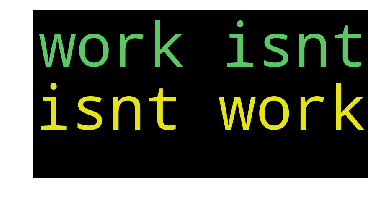

In [128]:
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
## # Spelling Correction

In [129]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [130]:
from textblob import TextBlob

In [140]:
x = ' thnks it is gret'

In [141]:
x = TextBlob(x).correct()

In [144]:
x

TextBlob(" thanks it is great")

In [ ]:
## Tokenization sing textblob

In [145]:
x = ' Thenks it is gret, i enjoid it'

In [146]:
TextBlob(x).words 

WordList(['Thenks', 'it', 'is', 'gret', 'i', 'enjoid', 'it'])

In [147]:
doc = nlp(x)
for token in doc:
    print(token)  # spacy

 
Thenks
it
is
gret
,
i
enjoid
it


In [ ]:
# tokenization in nltk

In [ ]:
# DETECTING NOUNS

In [148]:
doc = nlp(x)

In [149]:
for noun in doc.noun_chunks:
    print(noun)

 Thenks
it
i
it


In [ ]:
# Language translation and detection

In [150]:
x

' Thenks it is gret, i enjoid it'

In [151]:
tb = TextBlob(x)

In [152]:
tb.detect_language()

'en'

In [154]:
tb.translate(to = 'es')

TextBlob("Entonces es genial, lo disfruté")

In [ ]:
# visit codes for the representation of names of languages

In [ ]:
## Sentiment classifier in textblob

In [155]:
x = 'we all stands together'

In [160]:
from textblob.sentiments import NaiveBayesAnalyzer

In [161]:
TextBlob(x , analyzer=NaiveBayesAnalyzer())

TextBlob("we all stands together")

In [162]:
tb.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)